# Advent Of Code 2021

This repository tracks my solutions for [Advent Of Code 2021](https://adventofcode.com/2021). This year I decided to create a single jupyter notebook for documenting the journey. The notebook is finally converted into a markdown file, so it can be used as this repo's README. Instructions are just copied as plain HTML from the website. 

<h2>Day 1: Sonar Sweep</h2>
<details><summary>Expand/collapse</summary>
<p>You're minding your own business on a ship at sea when the overboard alarm goes off! You rush to see if you can help. Apparently, one of the Elves tripped and accidentally sent the sleigh keys flying into the ocean!</p>
<p>Before you know it, you're inside a submarine the Elves keep ready for situations like this. It's covered in Christmas lights (because of course it is), and it even has an experimental antenna that should be able to track the keys if you can boost its signal strength high enough; there's a little meter that indicates the antenna's signal strength by displaying 0-50 <em class="star">stars</em>.</p>
<p>Your instincts tell you that in order to save Christmas, you'll need to get all <em class="star">fifty stars</em> by December 25th.</p>
<p>Collect stars by solving puzzles.  Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first.  Each puzzle grants <em class="star">one star</em>. Good luck!</p>
<p>As the submarine drops below the surface of the ocean, it automatically performs a sonar sweep of the nearby sea floor. On a small screen, the sonar sweep report (your puzzle input) appears: each line is a measurement of the sea floor depth as the sweep looks further and further away from the submarine.</p>
<p>For example, suppose you had the following report:</p>
<pre><code>199
200
208
210
200
207
240
269
260
263
</code></pre>
<p>This report indicates that, scanning outward from the submarine, the sonar sweep found depths of <code>199</code>, <code>200</code>, <code>208</code>, <code>210</code>, and so on.</p>
<p>The first order of business is to figure out how quickly the depth increases, just so you know what you're dealing with - you never know if the keys will get <span title="Does this premise seem fishy to you?">carried into deeper water</span> by an ocean current or a fish or something.</p>
<p>To do this, count <em>the number of times a depth measurement increases</em> from the previous measurement. (There is no measurement before the first measurement.) In the example above, the changes are as follows:</p>
<pre><code>199 (N/A - no previous measurement)
200 (<em>increased</em>)
208 (<em>increased</em>)
210 (<em>increased</em>)
200 (decreased)
207 (<em>increased</em>)
240 (<em>increased</em>)
269 (<em>increased</em>)
260 (decreased)
263 (<em>increased</em>)
</code></pre>
<p>In this example, there are <em><code>7</code></em> measurements that are larger than the previous measurement.</p>
<p><em>How many measurements are larger than the previous measurement?</em></p>
</details>

### Solution Puzzle 1

Let's take a quick look at the data first:


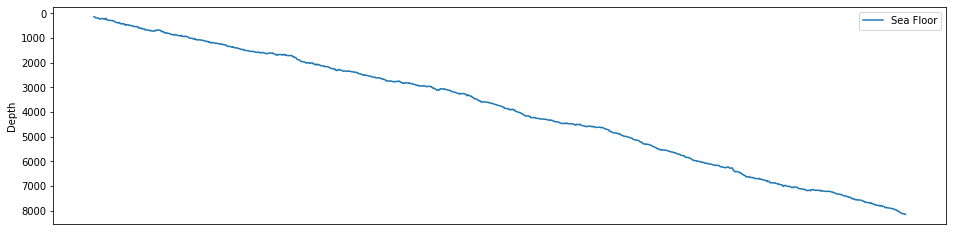

In [1]:
import tools
from matplotlib import pyplot as plt

plt.rcParams.update({"figure.facecolor": (1.0, 1.0, 1.0, 1.0)})

sea_floor_depths = tools.load_ints("day01.txt")

plt.figure(figsize=(16, 4))
plt.gca().invert_yaxis()
plt.xticks([])
plt.ylabel("Depth")
plt.plot(sea_floor_depths, label="Sea Floor")
plt.legend()
plt.show()


For the solution we simply need to iterate over the list of numbers in pairs.

In [2]:
from itertools import pairwise

n_increments = sum(1 for a, b in pairwise(sea_floor_depths) if b > a)

print(n_increments)


1532


### Part Two
<details><summary>Expand/collapse</summary>
<p>Considering every single measurement isn't as useful as you expected: there's just too much noise in the data.</p>
<p>Instead, consider sums of a <em>three-measurement sliding window</em>.  Again considering the above example:</p>
<pre><code>199  A      
200  A B    
208  A B C  
210    B C D
200  E   C D
207  E F   D
240  E F G  
269    F G H
260      G H
263        H
</code></pre>
<p>Start by comparing the first and second three-measurement windows. The measurements in the first window are marked <code>A</code> (<code>199</code>, <code>200</code>, <code>208</code>); their sum is <code>199 + 200 + 208 = 607</code>. The second window is marked <code>B</code> (<code>200</code>, <code>208</code>, <code>210</code>); its sum is <code>618</code>. The sum of measurements in the second window is larger than the sum of the first, so this first comparison <em>increased</em>.</p>
<p>Your goal now is to count <em>the number of times the sum of measurements in this sliding window increases</em> from the previous sum. So, compare <code>A</code> with <code>B</code>, then compare <code>B</code> with <code>C</code>, then <code>C</code> with <code>D</code>, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.</p>
<p>In the above example, the sum of each three-measurement window is as follows:</p>
<pre><code>A: 607 (N/A - no previous sum)
B: 618 (<em>increased</em>)
C: 618 (no change)
D: 617 (decreased)
E: 647 (<em>increased</em>)
F: 716 (<em>increased</em>)
G: 769 (<em>increased</em>)
H: 792 (<em>increased</em>)
</code></pre>
<p>In this example, there are <em><code>5</code></em> sums that are larger than the previous sum.</p>
<p>Consider sums of a three-measurement sliding window. <em>How many sums are larger than the previous sum?</em></p>
</details>

### Solution Puzzle 2

Here we need something like `pairwise`, but for triples. Generalized, this is a sliding window function. Unfortunately there is none in the standard library, so we create our own.

In [3]:
from typing import Iterable, Iterator, Sequence
from collections import deque


def sliding_window(data: Iterable, window_size: int) -> Iterator[Sequence]:
    input_iterator = iter(data)
    window = deque()
    for value in input_iterator:
        window.append(value)
        if len(window) < window_size:
            continue
        yield tuple(window)
        window.popleft()


With this function we can quickly compute the sums and calculate the number of windowed measurement increments.

In [4]:
sums = [sum(values) for values in sliding_window(sea_floor_depths, 3)]
n_increments = sum(1 for a, b in pairwise(sums) if b > a)

print(n_increments)


1571


## Day 2: Dive!
<details><summary>Expand/collapse</summary>
<p>Now, you need to figure out how to <span title="Tank, I need a pilot program for a B212 helicopter.">pilot this thing</span>.</p>
<p>It seems like the submarine can take a series of commands like <code>forward 1</code>, <code>down 2</code>, or <code>up 3</code>:</p>
<ul>
<li><code>forward X</code> increases the horizontal position by <code>X</code> units.</li>
<li><code>down X</code> <em>increases</em> the depth by <code>X</code> units.</li>
<li><code>up X</code> <em>decreases</em> the depth by <code>X</code> units.</li>
</ul>
<p>Note that since you're on a submarine, <code>down</code> and <code>up</code> affect your <em>depth</em>, and so they have the opposite result of what you might expect.</p>
<p>The submarine seems to already have a planned course (your puzzle input). You should probably figure out where it's going. For example:</p>
<pre><code>forward 5
down 5
forward 8
up 3
down 8
forward 2
</code></pre>
<p>Your horizontal position and depth both start at <code>0</code>. The steps above would then modify them as follows:</p>
<ul>
<li><code>forward 5</code> adds <code>5</code> to your horizontal position, a total of <code>5</code>.</li>
<li><code>down 5</code> adds <code>5</code> to your depth, resulting in a value of <code>5</code>.</li>
<li><code>forward 8</code> adds <code>8</code> to your horizontal position, a total of <code>13</code>.</li>
<li><code>up 3</code> decreases your depth by <code>3</code>, resulting in a value of <code>2</code>.</li>
<li><code>down 8</code> adds <code>8</code> to your depth, resulting in a value of <code>10</code>.</li>
<li><code>forward 2</code> adds <code>2</code> to your horizontal position, a total of <code>15</code>.</li>
</ul>
<p>After following these instructions, you would have a horizontal position of <code>15</code> and a depth of <code>10</code>. (Multiplying these together produces <code><em>150</em></code>.)</p>
<p>Calculate the horizontal position and depth you would have after following the planned course. <em>What do you get if you multiply your final horizontal position by your final depth?</em></p>
</details>

### Solution Puzzle 1

Let's first build some tools for parsing the input data:

In [5]:
from dataclasses import dataclass


@dataclass
class Command:
    direction: str
    distance: int


commands = [
    Command(direction=line.split()[0], distance=int(line.split()[1]))
    for line in tools.load_lines("day02.txt")
]


Now we can simply iterate over the commands and keep track of the position. I'll also store all positions, so we can visualize it afterwards.

**NOTE:** The description seems to be wrong:

> down X increases the depth by X units.
>
> up X decreases the depth by X units.

When doing it that way, the final depth will be negative and won't be accepted on the website. I had to flip it around.

In [6]:
horizontal_position, depth = (0, 0)
path = [(horizontal_position, depth)]
for command in commands:
    match command.direction:
        case "forward":
            horizontal_position += command.distance
        case "up":
            depth -= command.distance
        case "down":
            depth += command.distance
    path.append((horizontal_position, depth))

print("Final Position:", (horizontal_position, depth))
print("Solution:", horizontal_position * depth)

Final Position: (2033, 750)
Solution: 1524750


And visualizing the path of the submarine:

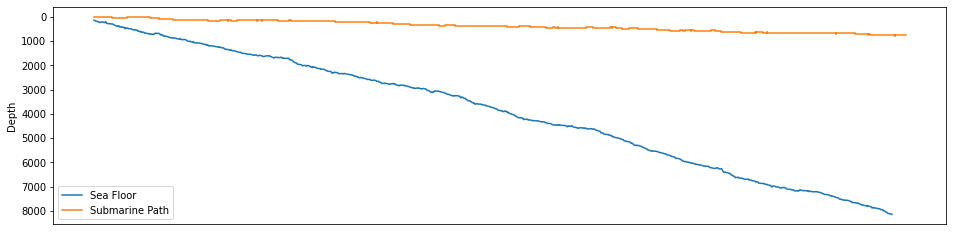

In [7]:
plt.figure(figsize=(16, 4))
plt.gca().invert_yaxis()
plt.ylabel("Depth")
plt.xticks([])
plt.plot(sea_floor_depths, label="Sea Floor")
plt.plot(*zip(*path), label="Submarine Path")
plt.legend()
plt.show()


### Part Two
<details><summary>Expand/collapse</summary>
<p>Based on your calculations, the planned course doesn't seem to make any sense. You find the submarine manual and discover that the process is actually slightly more complicated.</p>
<p>In addition to horizontal position and depth, you'll also need to track a third value, <em>aim</em>, which also starts at <code>0</code>. The commands also mean something entirely different than you first thought:</p>
<ul>
<li><code>down X</code> <em>increases</em> your aim by <code>X</code> units.</li>
<li><code>up X</code> <em>decreases</em> your aim by <code>X</code> units.</li>
<li><code>forward X</code> does two things:<ul>
  <li>It increases your horizontal position by <code>X</code> units.</li>
  <li>It increases your depth by your aim <em>multiplied by</em> <code>X</code>.</li>
</ul></li>
</ul>
<p>Again note that since you're on a submarine, <code>down</code> and <code>up</code> do the opposite of what you might expect: "down" means aiming in the positive direction.</p>
<p>Now, the above example does something different:</p>
<ul>
<li><code>forward 5</code> adds <code>5</code> to your horizontal position, a total of <code>5</code>. Because your aim is <code>0</code>, your depth does not change.</li>
<li><code>down 5</code> adds <code>5</code> to your aim, resulting in a value of <code>5</code>.</li>
<li><code>forward 8</code> adds <code>8</code> to your horizontal position, a total of <code>13</code>. Because your aim is <code>5</code>, your depth increases by <code>8*5=40</code>.</li>
<li><code>up 3</code> decreases your aim by <code>3</code>, resulting in a value of <code>2</code>.</li>
<li><code>down 8</code> adds <code>8</code> to your aim, resulting in a value of <code>10</code>.</li>
<li><code>forward 2</code> adds <code>2</code> to your horizontal position, a total of <code>15</code>.  Because your aim is <code>10</code>, your depth increases by <code>2*10=20</code> to a total of <code>60</code>.</li>
</ul>
<p>After following these new instructions, you would have a horizontal position of <code>15</code> and a depth of <code>60</code>. (Multiplying these produces <code><em>900</em></code>.)</p>
<p>Using this new interpretation of the commands, calculate the horizontal position and depth you would have after following the planned course. <em>What do you get if you multiply your final horizontal position by your final depth?</em></p>
</details>

### Solution Puzzle 2

This only needs slight adjustments from the previous solution.

In [8]:
horizontal_position, depth = (0, 0)
aim = 0
path = [(horizontal_position, depth)]
for command in commands:
    match command.direction:
        case "forward":
            horizontal_position += command.distance
            depth += aim * command.distance
        case "up":
            aim -= command.distance
        case "down":
            aim += command.distance
    path.append((horizontal_position, depth))

print("Final Position:", (horizontal_position, depth))
print("Solution:", horizontal_position * depth)


Final Position: (2033, 783289)
Solution: 1592426537


However, looking at the submarine path, I'm really not sure what's going on here. The solution is accepted though. But it doesn't make much sense to me.

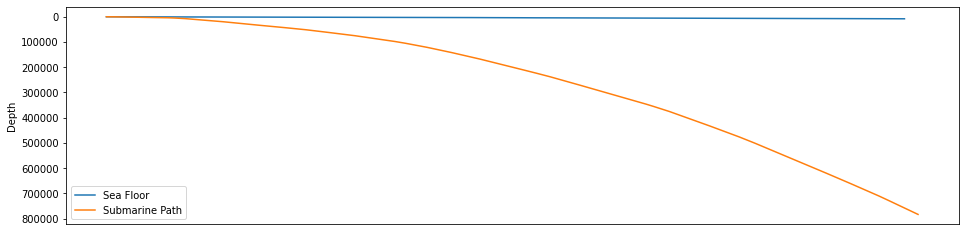

In [9]:
plt.figure(figsize=(16, 4))
plt.gca().invert_yaxis()
plt.ylabel("Depth")
plt.xticks([])
plt.plot(sea_floor_depths, label="Sea Floor")
plt.plot(*zip(*path), label="Submarine Path")
plt.legend()
plt.show()
